# Import Packages

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
import numpy as np
import geopandas as gpd
import xarray as xr

## import the data

In [12]:
nc_filebase = 'data/xarray_example/agg_macav2*' # include the wildcard (*) character to look for everything

ds_ens = xr.open_mfdataset(nc_filebase, # open as a multifile dataset
    combine = 'nested',  # nest everything in the same file
    concat_dim = 'ens' ) # Concatenate as an "ensemble"


Check

In [13]:
ds_ens['precipitation']

<xarray.DataArray 'precipitation' (ens: 5, time: 1128, lat: 49, lon: 73)>
dask.array<concatenate, shape=(5, 1128, 49, 73), dtype=float32, chunksize=(1, 1128, 49, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5
Dimensions without coordinates: ens
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

# Ensemble Means

In [14]:
ds_ens['precipitation'].mean(dim = 'ens')

<xarray.DataArray 'precipitation' (time: 1128, lat: 49, lon: 73)>
dask.array<mean_agg-aggregate, shape=(1128, 49, 73), dtype=float32, chunksize=(1128, 49, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5

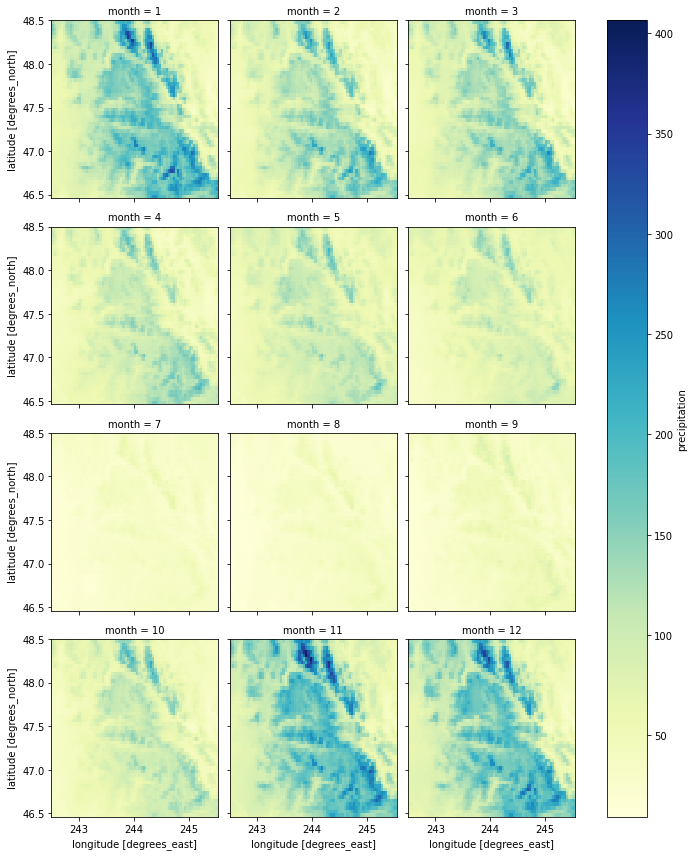

In [20]:
ds_ens['precipitation' # look at precipitation
    ].mean(dim = 'ens' # take the mean accross the ensemble
    ).groupby('time.month' # group by month
    ).mean( dim = 'time' # take the mean accross time
    ).plot(col = 'month' ,  # plot by month
        col_wrap = 3, # three columns
        cmap = 'YlGnBu' # assign colormap
        )

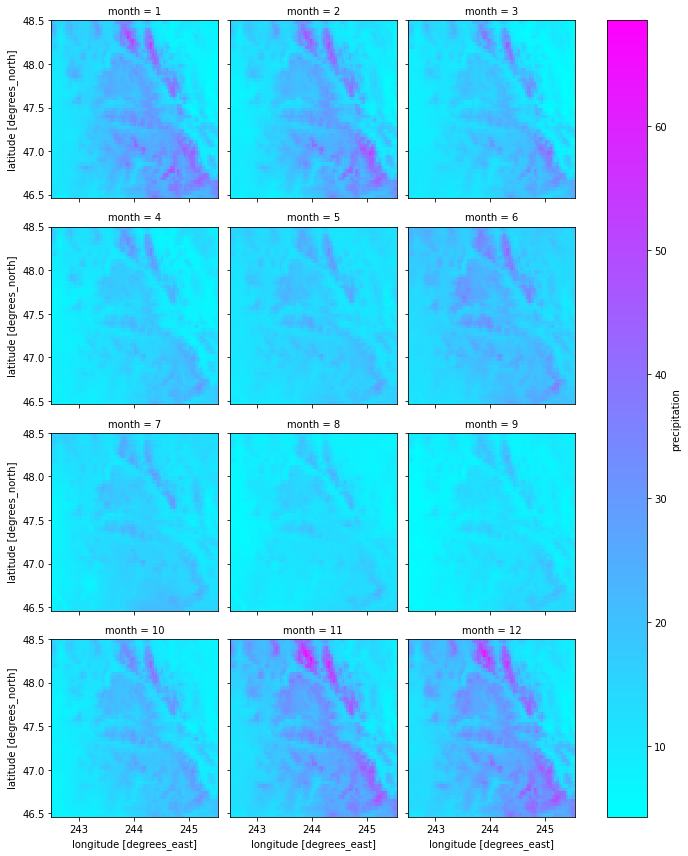

In [24]:
# standard deviation
ds_ens['precipitation' # look at precipitation
       ].std(dim = 'ens' # look at the standard deviation
           ).groupby('time.month' # group by month
              ).std( dim = 'time' # take the deviation accross time
                   ).plot(col = 'month' ,  # plot by month
                         col_wrap = 3, # three columns
                         cmap = 'cool', # assign colormap
                         )

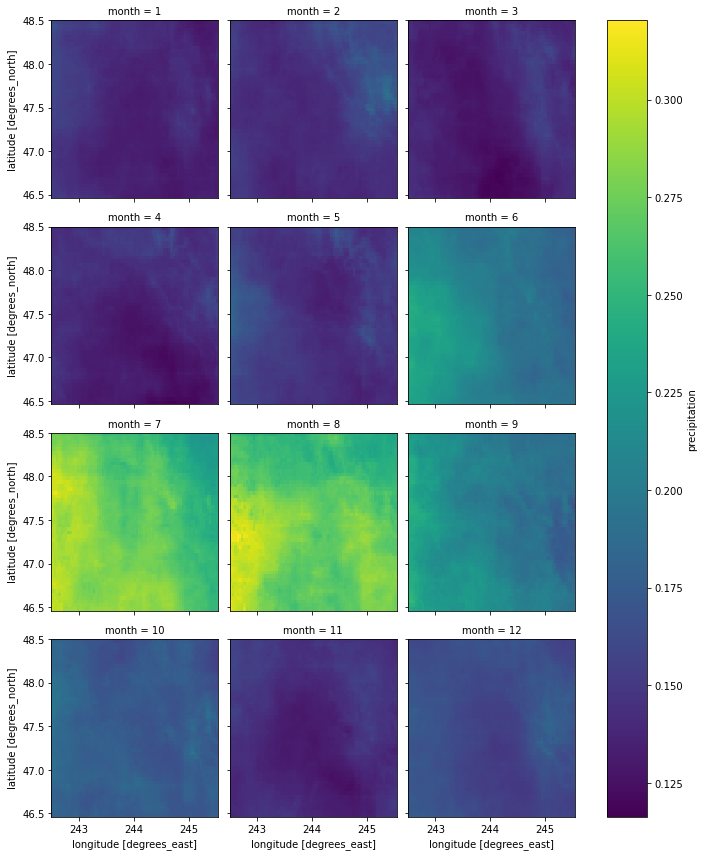

In [30]:
# z score
(ds_ens['precipitation'].std(dim = 'ens')/ds_ens['precipitation'].mean(dim = 'ens')
    ).groupby('time.month' # group by month
              ).std( dim = 'time' # take the deviation accross time
                   ).plot(col = 'month' ,  # plot by month
                         col_wrap = 3, # three columns
                        #  cmap = '', # assign colormap
                         )